# Walk-through of One-way ANOVA with Post-Hocs In R
By James Marquez, April 5, 2017

[ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) is an **AN**alysis **O**f **VA**riance. It is a test to determine if there is a significant difference between the means of two or more populations. It describes the variance within groups and the variance between groups. It tests the null hypothesis which states that all population means are equal while the alternative hypothesis states that at least one is different. One-way ANOVA is used to test groups with only one response variable.

For this example, we're going to use a very popular dataset that is built into R and is used in a lot of machine learning examples. It's called the [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset and is a collection of flower samples each labeled with its flower species. There are four explanatory variables that describe each Species, which are Sepal Length, Sepal Width, Petal Length, and Petal Width. We're going to use this dataset as a toy example and use Sepal Width as our response variable (dependent variable) to test if there is a significant difference between the mean sepal widths of each species (independent variable) of iris flower.

## Loading the Data
The first step is to load the custom packages we will use to increase the functionality of base R.

In [2]:
library(plyr) # Tools for splitting, applying and combining data
library(ggplot2) # Functions used to create beautful plots
library(mosaic) # Plot TukeyHSD

## Viewing the Data's Structure
Next, let's load the iris dataset and explore it a few different ways to get a good understanding of the data we have available to us.

In [3]:
data('iris') # Load the iris dataset into local memory

str(iris) # View the structure of the iris dataset
table(iris$Species) # View the number of samples in each category of Species
head(iris) # View the first six rows of the iris dataset 

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...



    setosa versicolor  virginica 
        50         50         50 

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


We can see that our dataset has 150 observations or samples. It has 5 variables, four continuous variables that explain each Species type. The Species variable consists of 3 factor levels (categories); setosa, versicolor, and virginica consisting of 50 samples each.

In our walk-through, we're going to look at the variances of only one variable, Sepal Width, which is called the response variable. We are going to run an ANOVA test on this variable to see if there are significant differences between the means of each flower type's sepal widths or if the differences may be caused by random chance.

## Determining If Groups Are Normally Distributed

Let's first look at a density plot of each species' Sepal Width to verify that each is approximately a normally distributed population, which is a requirement to perform an ANOVA test. We'll use ggplot2 to create our plot.

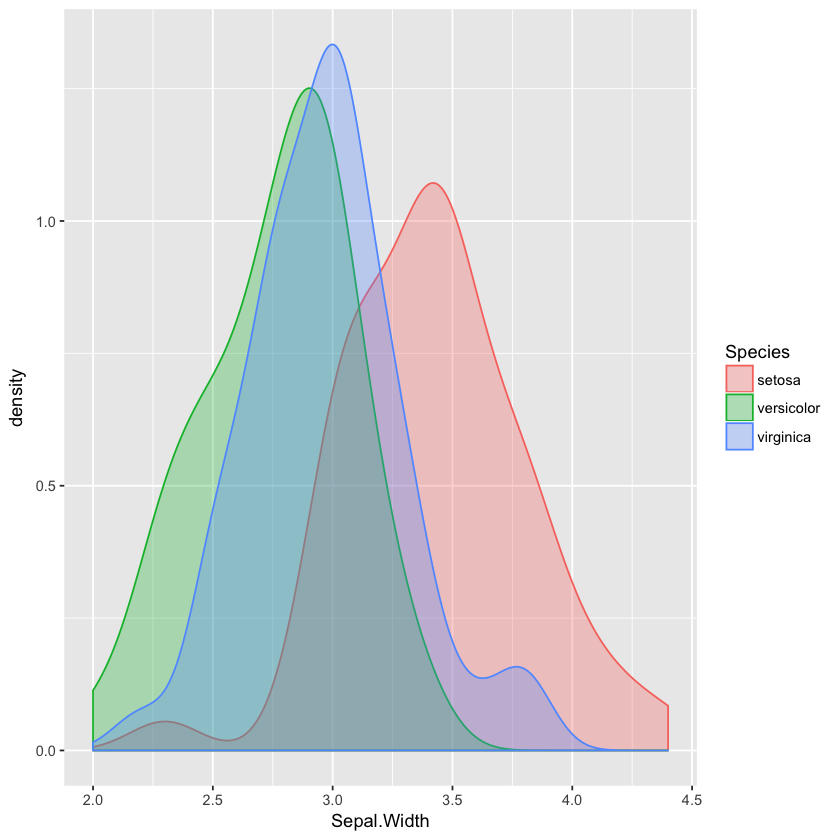

In [4]:
# Group, color, and fill by Species
ggplot(iris, aes(x=Sepal.Width)) +
  geom_density(aes(group=Species, color=Species, fill=Species), alpha=0.3)

We can see that all three have approximately normally distributed populations so we can continue with our one-way ANOAVA test.

## One-way ANOVA
Next, let's perform our ANOVA test. We'll use the aov() function and pass in our variables in the correct order. We'll save our results to an object we name ANOVA.

In [5]:
ANOVA <- aov(Sepal.Width ~ Species, data=iris) # (response ~ groups, data=dataset) or (DV - IV, data=dataset)
summary(ANOVA) # View results of the ANOVA test

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

We can see that the p-value is less than our alpha 0.05 significance level we've chosen, which means we reject the null hypothesis that the differences between the means are not statistically significant and instead accept the alternative hypothesis that the differences between at least one of the means is statistically significant. Our extremely low p-value means that there is a 0.00000000000002% chance we are wrong in our decision to reject the null hypothesis.  Next, we'll run post-hoc tests, such as Tukey's Honest Significant Difference test, to determine which species have significantly different means.

## Post-hoc Tests
### Tukey's Honest Significant Difference Test
Performing this test is easy as it requires only one line. We pass in our ANOVA object to the TukeyHSD function.

In [6]:
TukeyHSD(ANOVA)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802


Using an alpha of 0.05, we can see that the p adj value is less than our alpha in all three pairwise comparisons meaning there is a significant difference between all three species' means. We can use the mosaic package to visualize the results of TukeyHSD. We pass the TukeyHSD() function into the mplot() function.

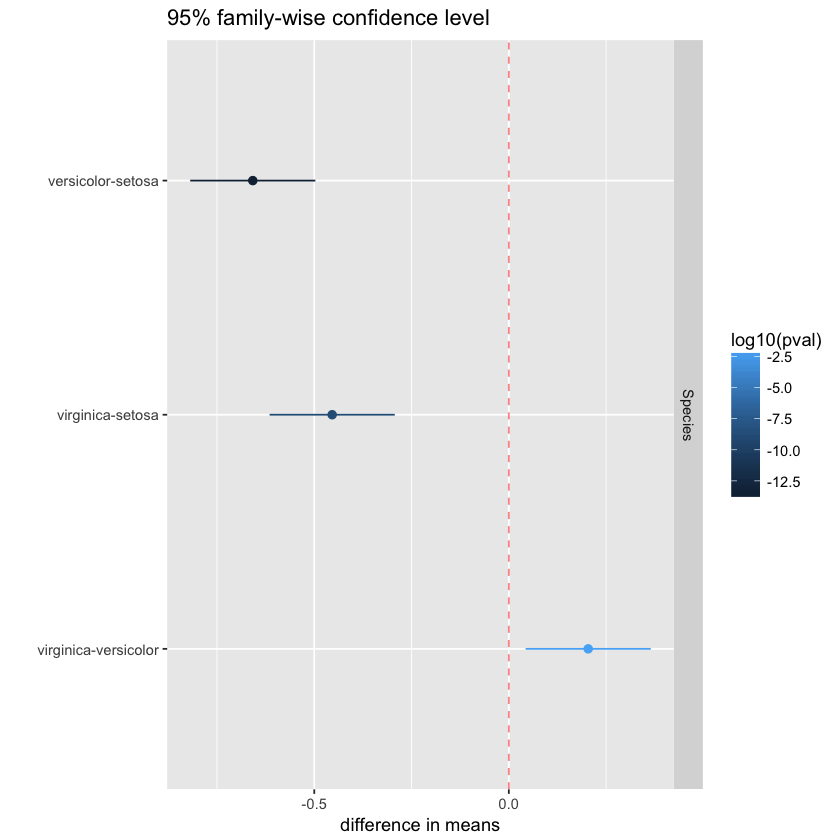

In [7]:
mplot(TukeyHSD(ANOVA), system="ggplot") # Use the mosaic package to plot the results of TukeyHSD

### Pairwise T-Test
If you prefer to do t-tests, you can use the following method to perform pairwise t-tests on all your factor levels. The pairwise.t.test() function allows you to choose between eight p-value adjustments to help counteract the problem of multiple comparisons: holm, hochberg, hommel, bonferroni, BH, BY, fdr, and none. To reduce the chance of incorrectly rejecting our null hypothesis (Type I error) we'll use the [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction) method when performing our multiple comparisons.

In [8]:
pairwise.t.test(iris$Sepal.Width, iris$Species, 
                p.adj="bonferroni", paired=FALSE)


	Pairwise comparisons using t tests with pooled SD 

data:  iris$Sepal.Width and iris$Species 

           setosa  versicolor
versicolor < 2e-16 -         
virginica  1.4e-09 0.0094    

P value adjustment method: bonferroni 

Our t-test comparisons show that all three species' means are significantly different because all p-values are less than our 0.05 alpha.

## References

1. [One-way ANOVAs in R – including post-hocs/t-tests and graphs](https://www.r-bloggers.com/one-way-anovas-in-r-–-including-post-hocst-tests-and-graphs/) by Hayward Godwin
2. [What is ANOVA?](http://support.minitab.com/en-us/minitab/17/topic-library/modeling-statistics/anova/basics/what-is-anova/) by Minitab
3. [Analysis of variance](https://en.wikipedia.org/wiki/Analysis_of_variance) by Wikipedia
4. [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) by Wikipedia
5. [Tukey's range test](https://en.wikipedia.org/wiki/Tukey%27s_range_test) by Wikipedia
6. [ANOVA and Tukey’s test on R](https://www.r-bloggers.com/anova-and-tukeys-test-on-r/) by Flavio Barros
7. [Graphics with the mosaic package](https://cran.r-project.org/web/packages/mosaic/vignettes/GraphicsWithMosaic.html) by Randall Pruim
8. [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction) by Wikipedia